In [51]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
import os

RESULTS_PATH = 'results/'

# Get all of the result files for the notebooks
results = []
for root, dirs, files in os.walk(RESULTS_PATH):
    for file in files:
        if file.endswith('.csv'):  # Must be a CSV
            results.append(file)

In [53]:
# Bar chart for a single notebook
def plot_bar(notebook):
    df = pd.read_csv(RESULTS_PATH + notebook + '.csv')

    df = df[df['model'] != 'SGD']
    df = df[df['model'] != 'RNNMultiple']
    df = df[df['model'] != 'RNNAll']

    df.plot(x='model', y=['train', 'test'], kind='bar', title=notebook, figsize=(15, 10), legend=True, fontsize=12)
    plt.ylabel('MAE Loss (Mean Average Error)')
    plt.show()

In [54]:
# Line chart for models across a set of notebooks
def plot_line(notebooks, ignore=None):
    df_all = pd.DataFrame()

    for notebook in notebooks:
        df = pd.read_csv(RESULTS_PATH + notebook + '.csv')
        df = df[df['model'] != 'SGD']
        df = df[df['model'] != 'RNNMultiple']
        df = df[df['model'] != 'RNNAll']
        
        if ignore is not None:
            for ign in ignore:
                df = df[df['model'] != ign]
                
        models = list(df['model'].unique())

        append_object = {'notebook': notebook}
        for model in models:
            append_object[model] = df[df['model'] == model]['test'].values[0]
        df_all = df_all.append(append_object, ignore_index=True)

    df_all.plot(x='notebook', figsize=(15, 10), legend=True, fontsize=12)
    plt.show()

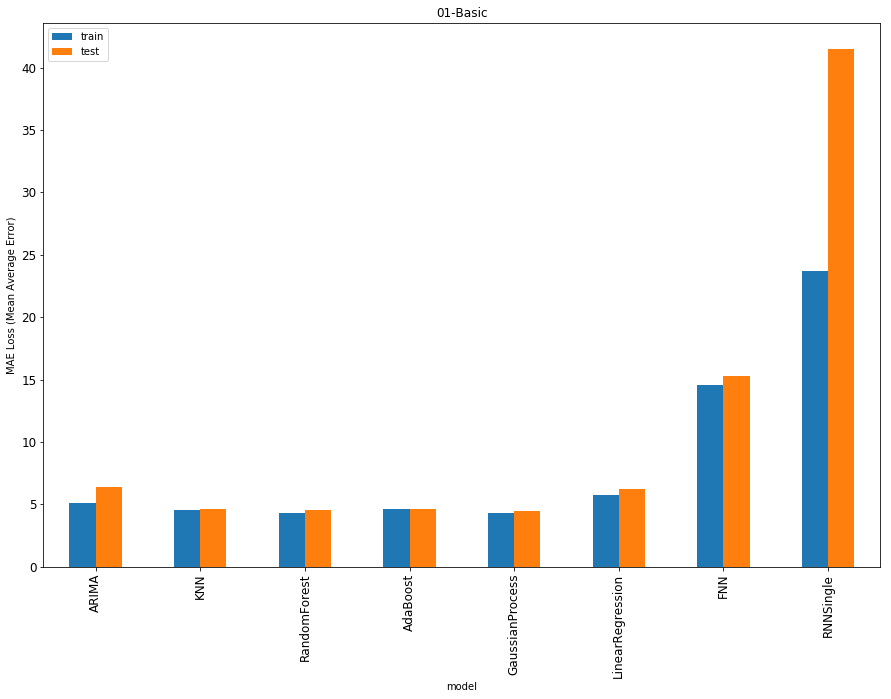

In [55]:
plot_bar('01-Basic')

# Chunk Data

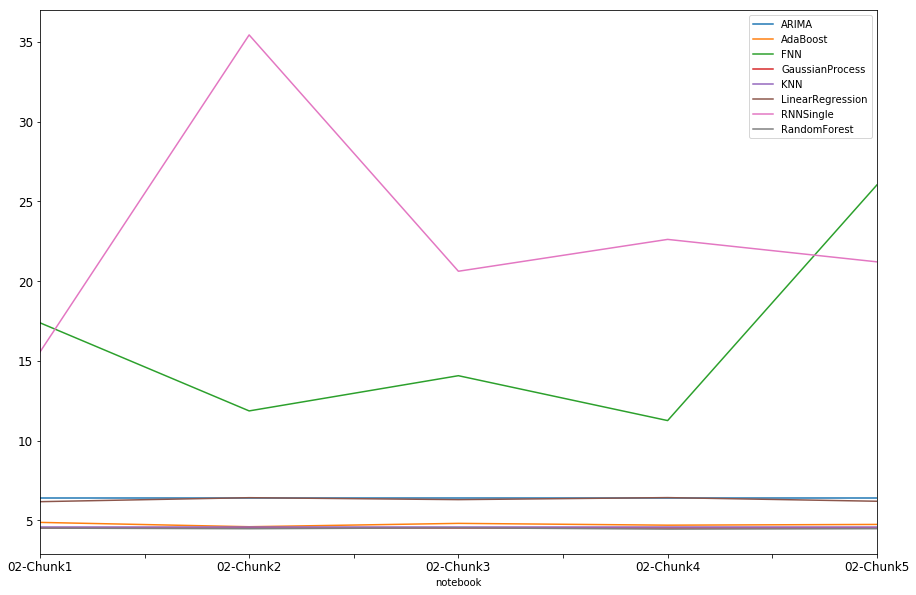

In [56]:
plot_line(['02-Chunk1', '02-Chunk2', '02-Chunk3', '02-Chunk4', '02-Chunk5'])

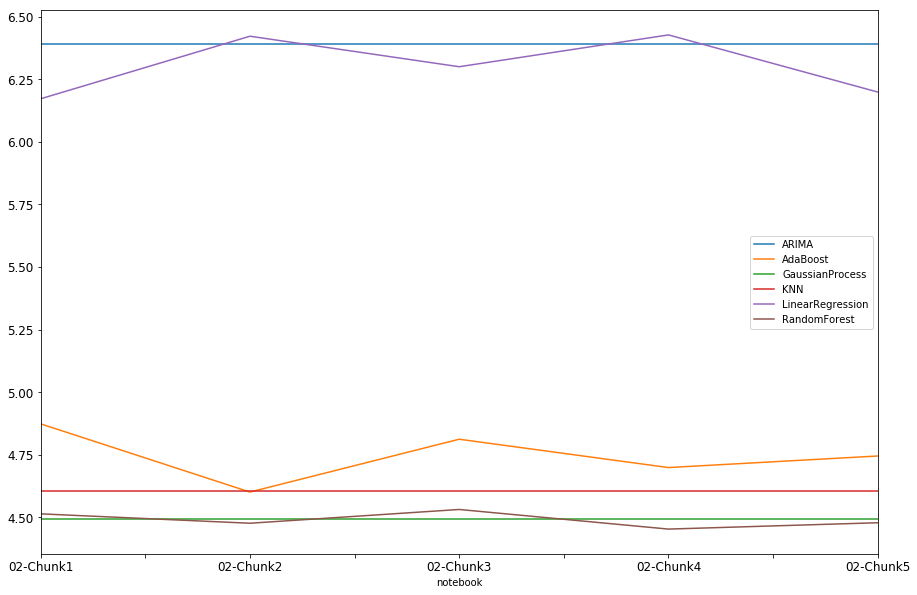

In [57]:
plot_line(['02-Chunk1', '02-Chunk2', '02-Chunk3', '02-Chunk4', '02-Chunk5'], ignore=['RNNSingle', 'FNN'])

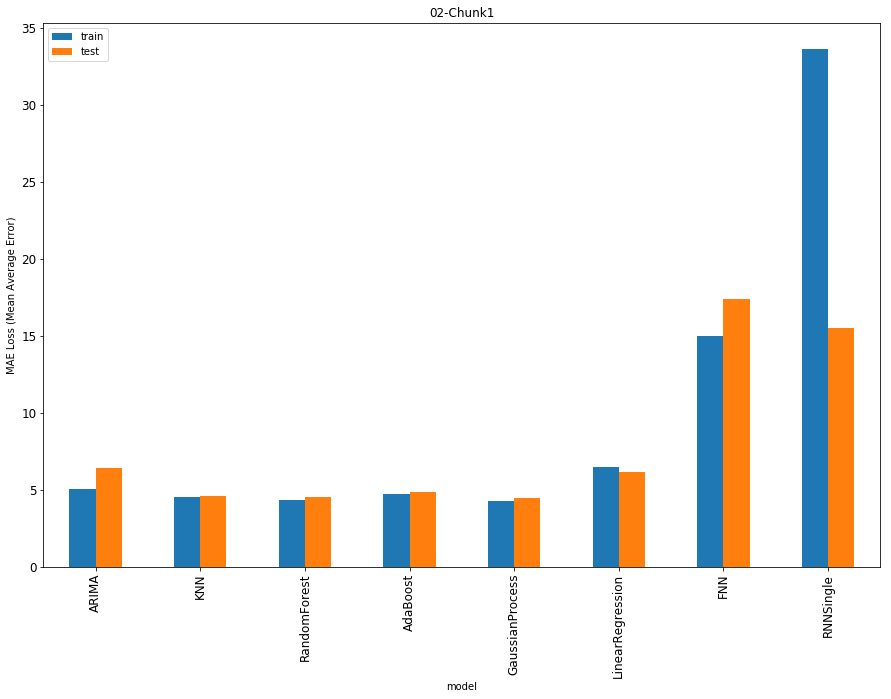

In [58]:
plot_bar('02-Chunk1')

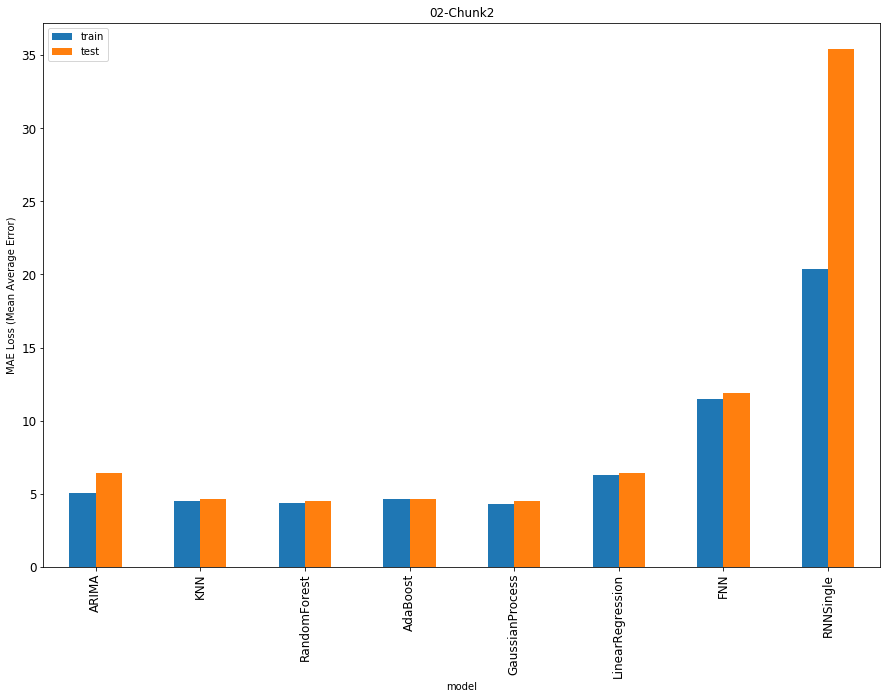

In [59]:
plot_bar('02-Chunk2')

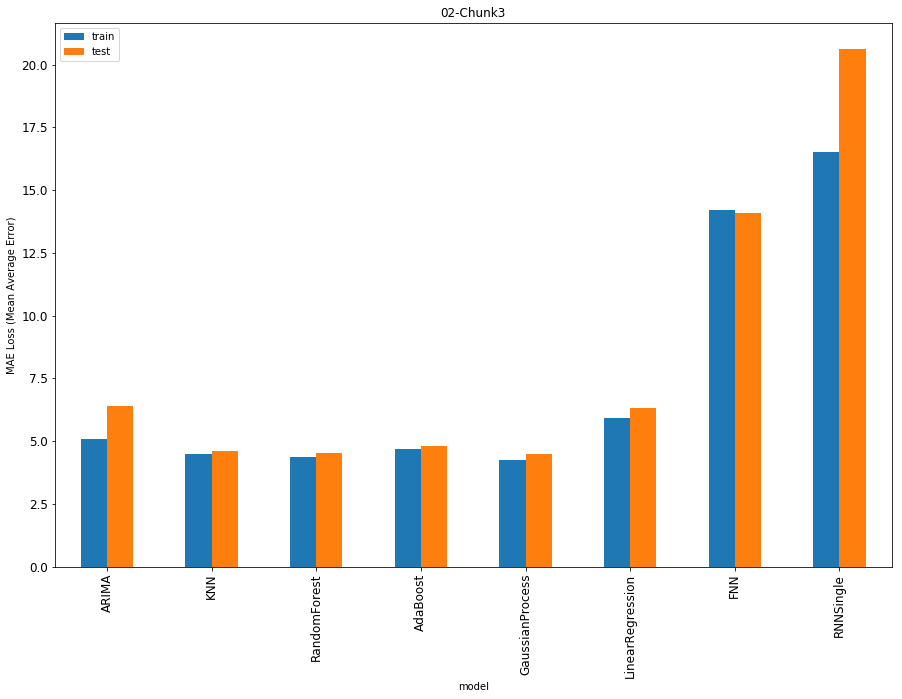

In [60]:
plot_bar('02-Chunk3')

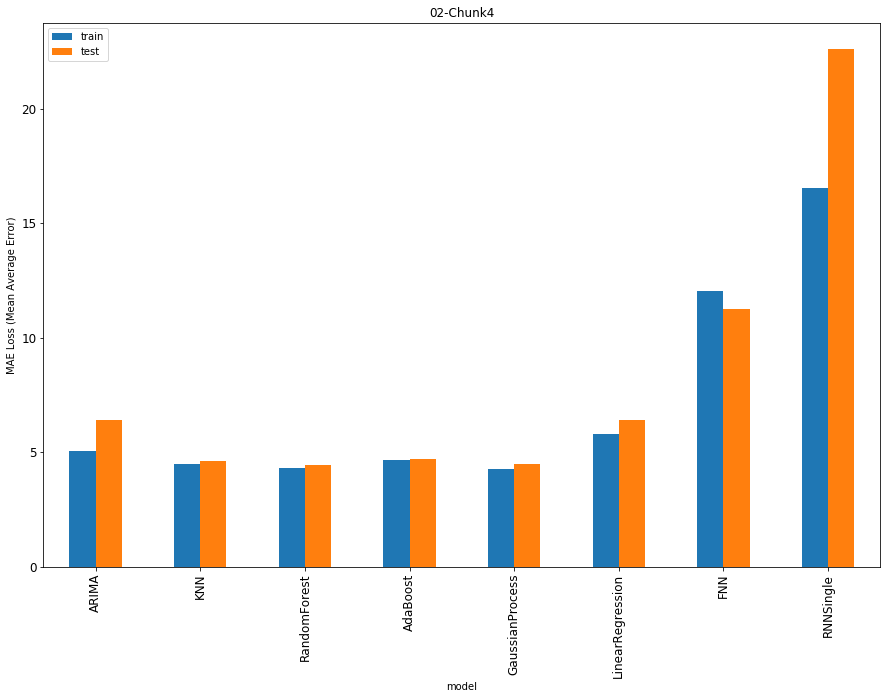

In [61]:
plot_bar('02-Chunk4')

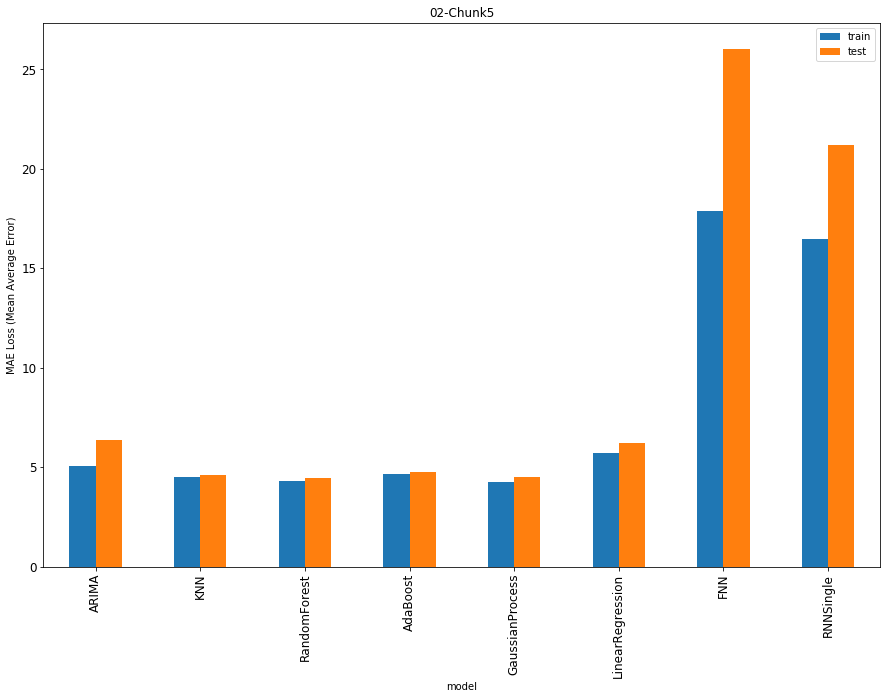

In [62]:
plot_bar('02-Chunk5')

# Features

### <YYYY, MM, DD>

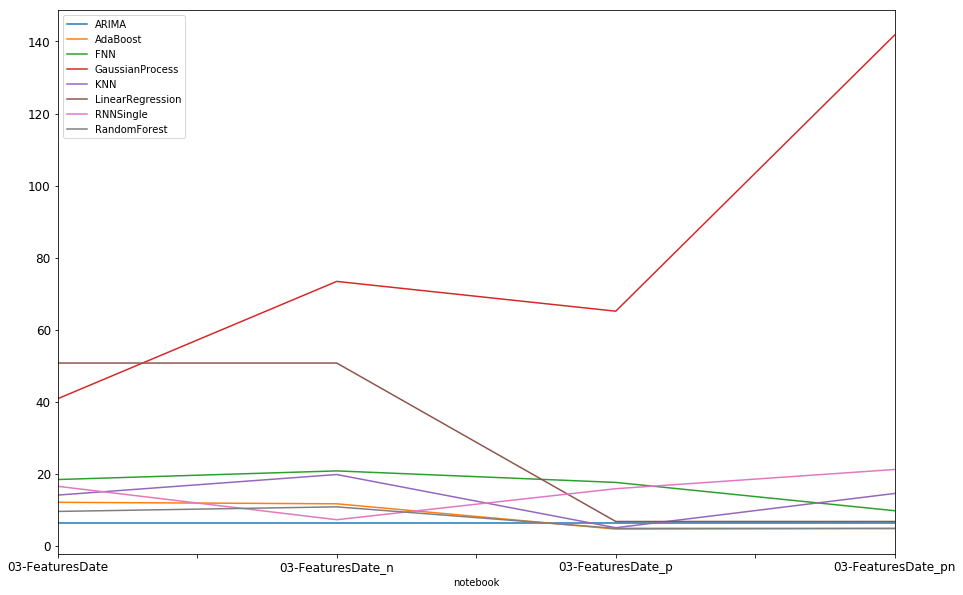

In [63]:
plot_line(['03-FeaturesDate', '03-FeaturesDate_n', '03-FeaturesDate_p', '03-FeaturesDate_pn'])

Going to ignore the red model (GaussianProcess) due to it causing the scale for other models to be barely visible.

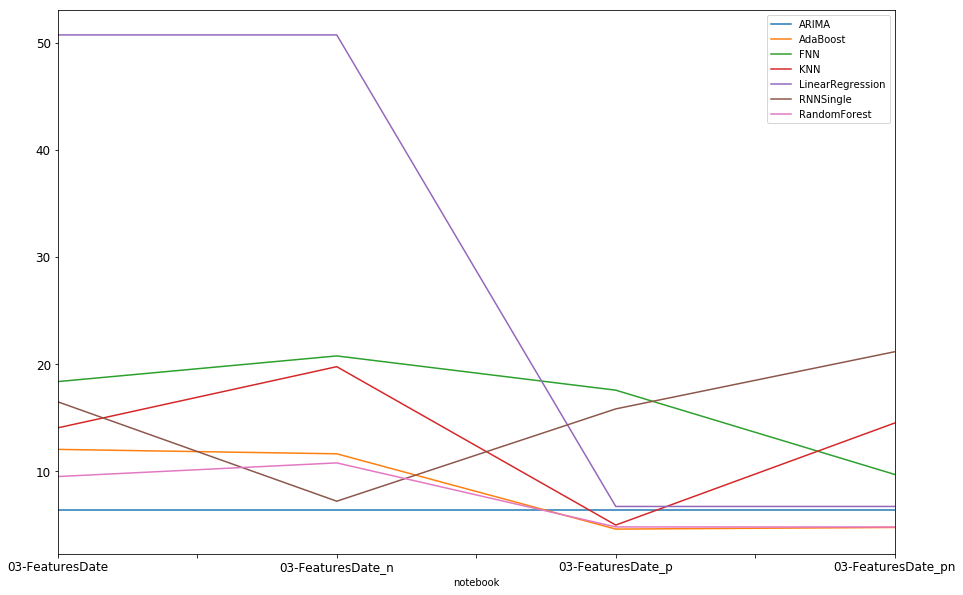

In [64]:
plot_line(['03-FeaturesDate', '03-FeaturesDate_n', '03-FeaturesDate_p', '03-FeaturesDate_pn'], ignore=['GaussianProcess'])

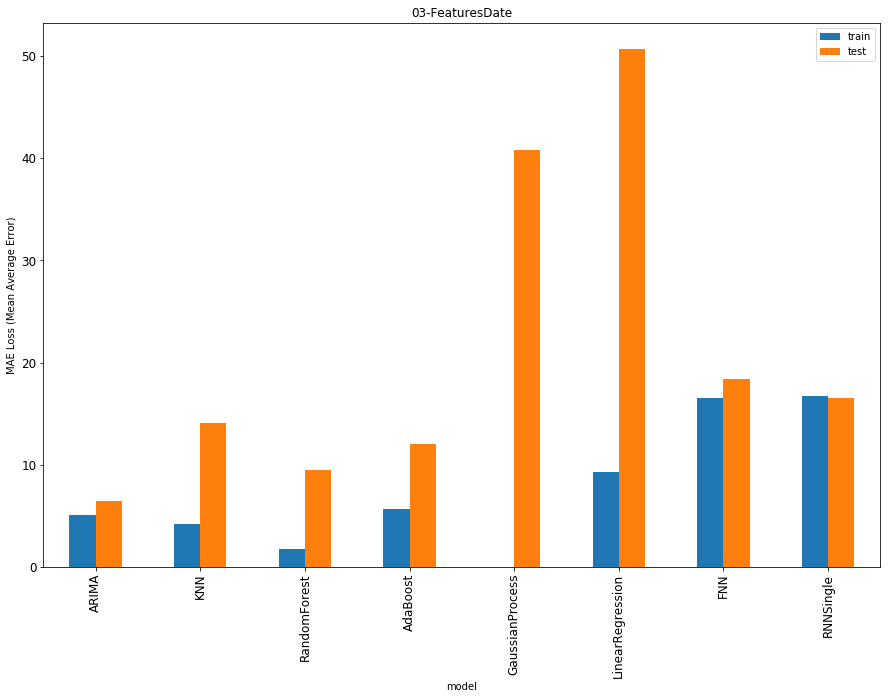

In [65]:
plot_bar('03-FeaturesDate')

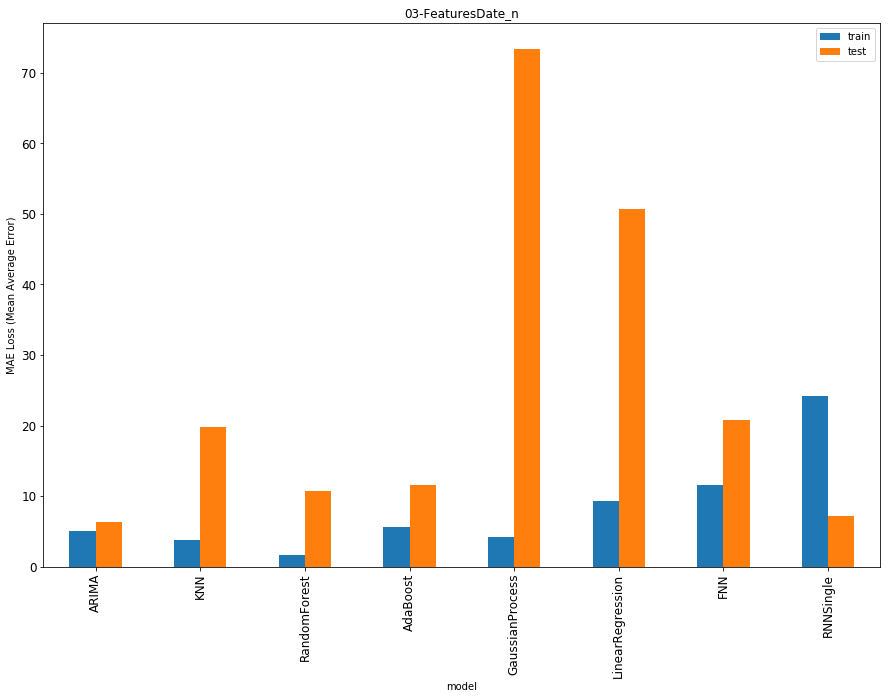

In [66]:
plot_bar('03-FeaturesDate_n')

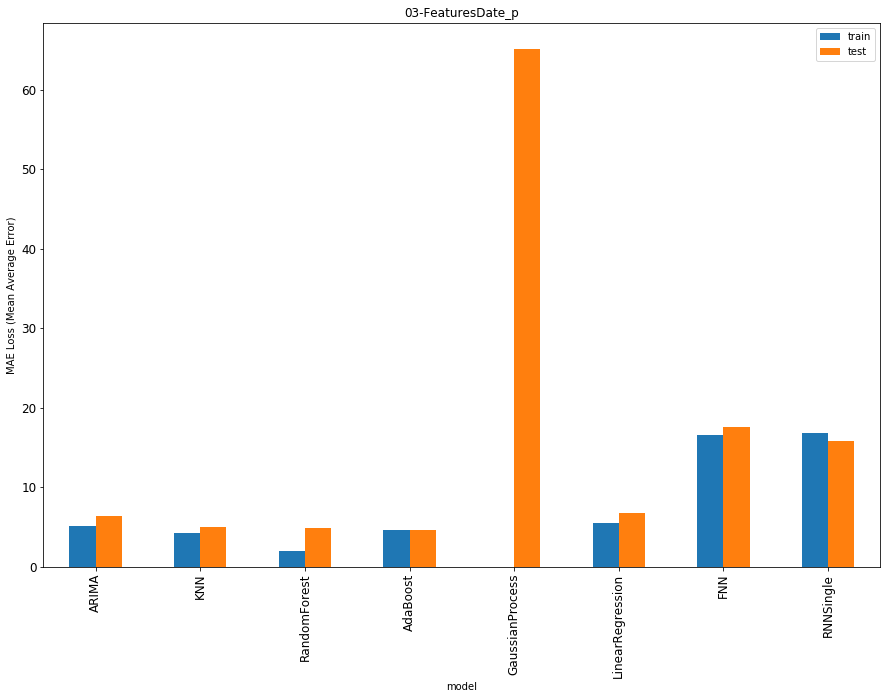

In [67]:
plot_bar('03-FeaturesDate_p')

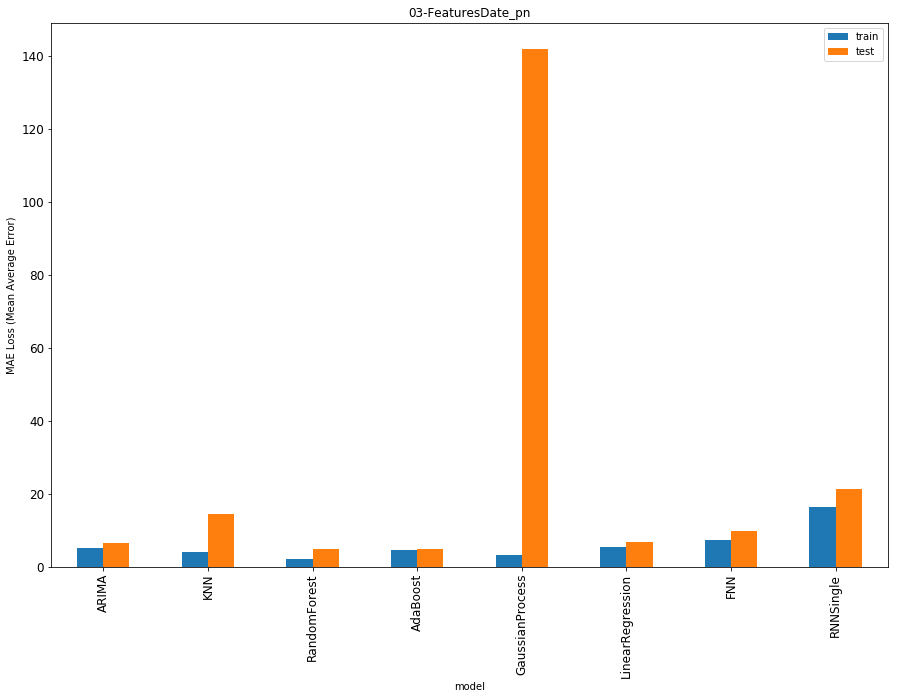

In [68]:
plot_bar('03-FeaturesDate_pn')

### <actual_min_temp, actual_max_temp, actual_precipitation>

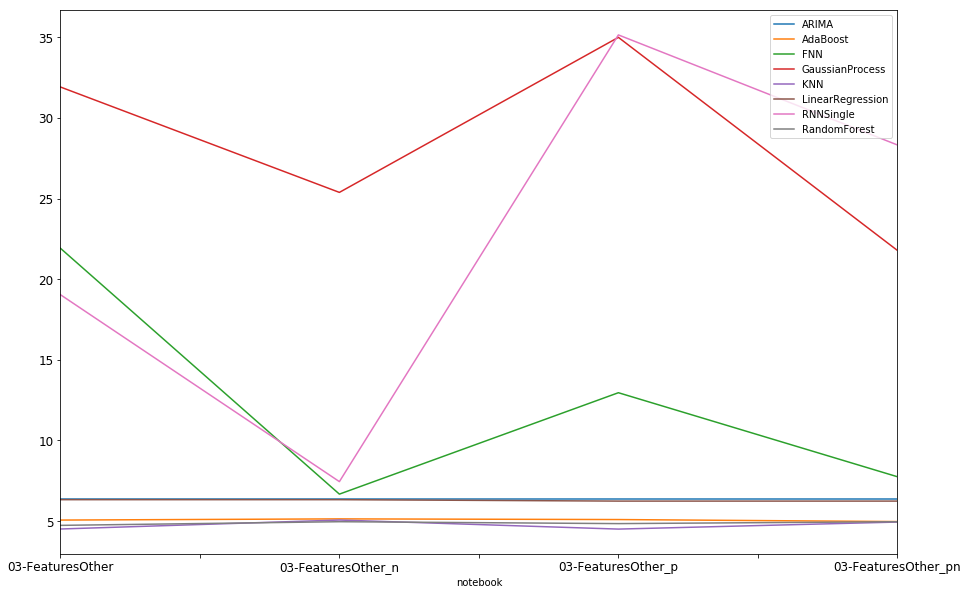

In [69]:
plot_line(['03-FeaturesOther', '03-FeaturesOther_n', '03-FeaturesOther_p', '03-FeaturesOther_pn'])

Going to ignore a bunch of models from the top to be able to see the bottom ones that are on a smaller scale

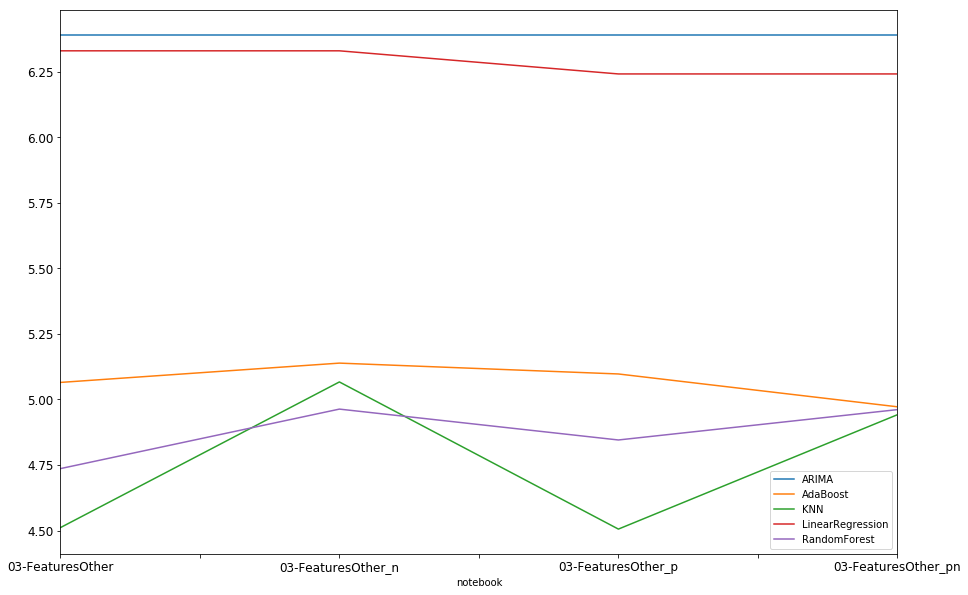

In [70]:
plot_line(['03-FeaturesOther', '03-FeaturesOther_n', '03-FeaturesOther_p', '03-FeaturesOther_pn'], ignore=['GaussianProcess', 'RNNSingle', 'FNN'])

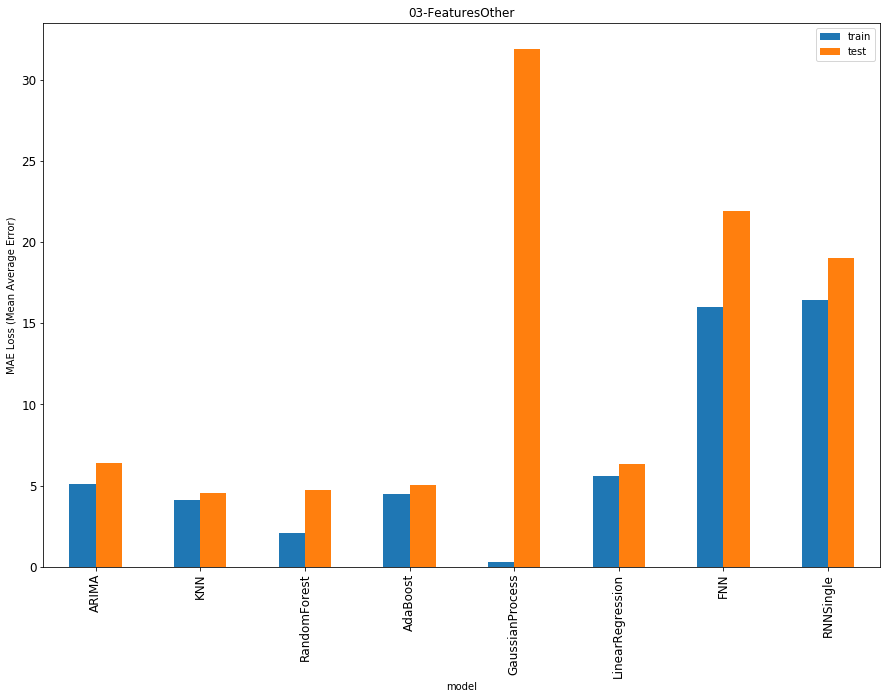

In [71]:
plot_bar('03-FeaturesOther')

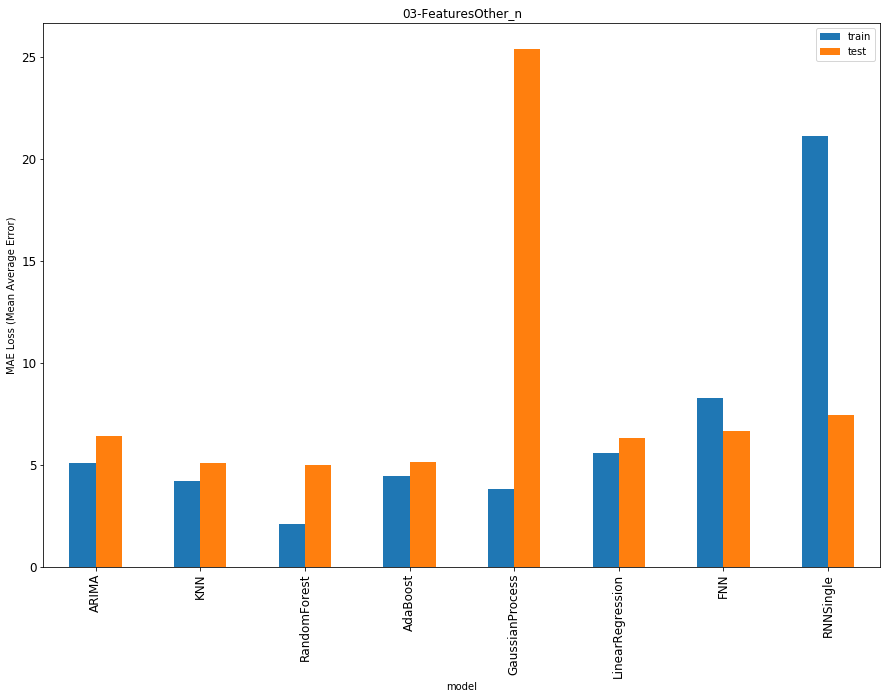

In [72]:
plot_bar('03-FeaturesOther_n')

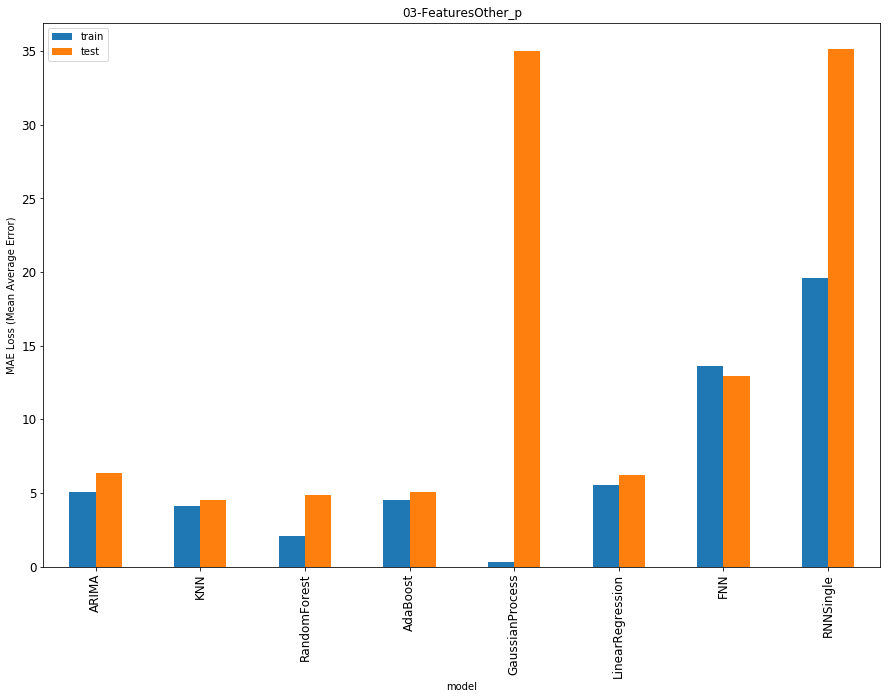

In [73]:
plot_bar('03-FeaturesOther_p')

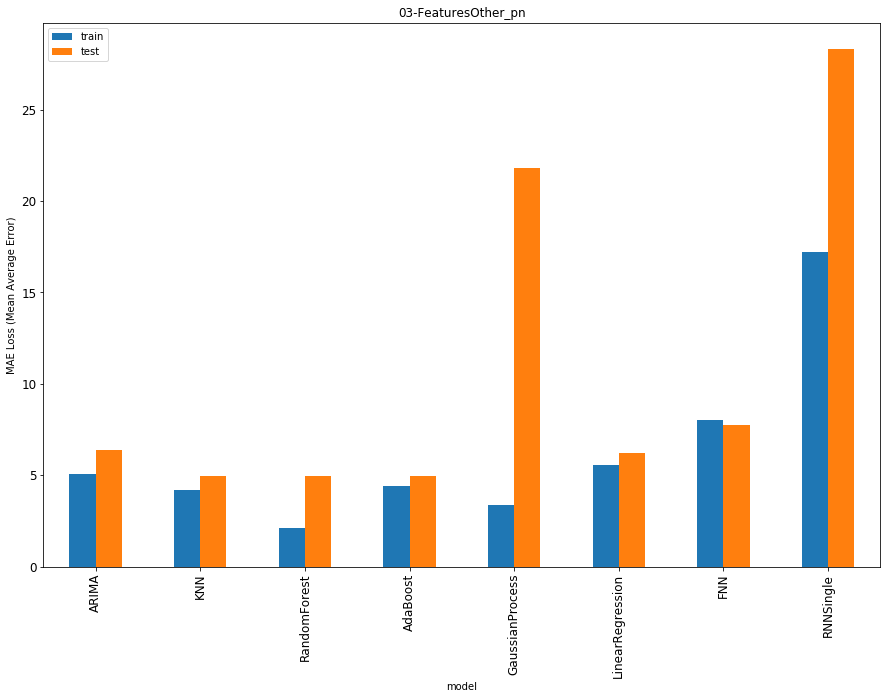

In [74]:
plot_bar('03-FeaturesOther_pn')